In [1084]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential



In [1085]:
## load the dataset
Heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
Heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,45.00,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
1,75.00,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
2,42.00,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
3,70.00,0,212,1,17,1,389000.00,1.00,136,1,1,188,0
4,46.00,0,168,1,17,1,271000.00,2.10,124,0,0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,60.00,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
295,50.00,0,582,0,62,1,147000.00,0.80,140,1,1,192,0
296,65.00,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
297,54.00,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [1086]:
Heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [1087]:
Heart.drop_duplicates()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,45.00,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
1,75.00,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
2,42.00,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
3,70.00,0,212,1,17,1,389000.00,1.00,136,1,1,188,0
4,46.00,0,168,1,17,1,271000.00,2.10,124,0,0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,60.00,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
295,50.00,0,582,0,62,1,147000.00,0.80,140,1,1,192,0
296,65.00,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
297,54.00,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


## The dataset is clean, there is no Blank and No Duplicated items


In [1088]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = Heart.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.10,0.06,0.09,-0.05,0.16,-0.05,0.07,0.02,-0.22,0.25
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.10,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.06,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.09,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.05,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.16,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,0.07,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00


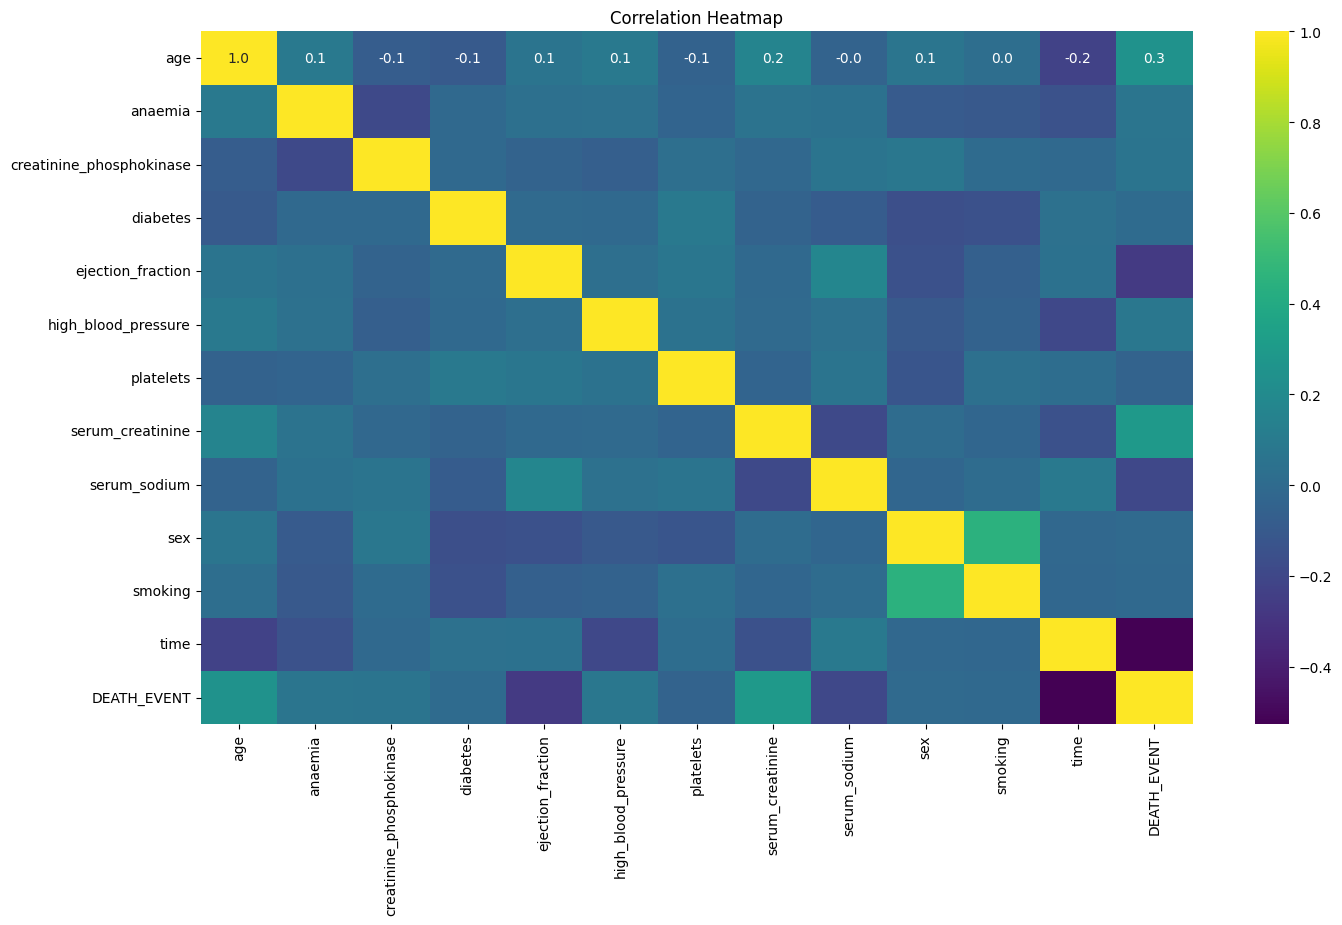

In [1089]:
plt.figure(figsize=(16,9))
sns.heatmap(corr_mat, annot=True, cmap="viridis", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [1090]:
##Describing  Heart data, find mean, median,std, Min, Max, LQ,Median, UQ in 2 decimal place 

pd.options.display.float_format = '{:.2f}'.format
Heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


##Model building/ Creating Variables

Choosing DEATH_EVENT as dependent as the rest od features as independent for now



In [1091]:
## Creat variables
x = Heart.iloc[:, 0:12]
y = Heart.iloc[:, 12]

In [1092]:
## splitting our data
## 80 % training 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [1093]:
##checking the column to make sure we chose the correct columns
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
155,66.00,1,68,1,38,1,162000.00,1.00,136,0,0,95
293,42.00,0,582,0,60,0,263358.03,1.18,137,0,0,82
183,90.00,1,47,0,40,1,204000.00,2.10,132,1,1,8
217,41.00,0,148,0,40,0,374000.00,0.80,140,1,1,68
15,59.00,0,66,1,20,0,70000.00,2.40,134,1,0,135
...,...,...,...,...,...,...,...,...,...,...,...,...
71,60.00,0,2656,1,30,0,305000.00,2.30,137,1,0,30
252,65.00,0,118,0,50,0,194000.00,1.10,145,1,1,200
88,45.00,1,981,0,30,0,136000.00,1.10,137,1,0,11
43,60.00,1,156,1,25,1,318000.00,1.20,137,0,0,85


In [1094]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## LOGISTIC Regression Model


In [1095]:
## LOGISTIC REGRESSION
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log= log_reg.predict(x_test)

In [1096]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predited':y_pred_log}).sample(10)


,Actual,Predited
151,0,1
283,0,0
255,0,0
109,0,0
135,0,0
161,0,0
164,0,0
268,0,0
204,0,0
23,0,1


In [1097]:
## model evaluation
accuracy_Log_reg = accuracy_score(y_test, y_pred_log )

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_log)

print('Accuracy_Log_Reg', (metrics.accuracy_score(y_test, y_pred_log))*100, '%')
print(accuracy_Log_reg)
print(conf_mat)



Accuracy_Log_Reg 83.33333333333334 %
0.8333333333333334
[[36  5]
 [ 5 14]]


In [1098]:
## classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



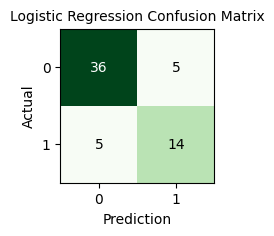

In [1099]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

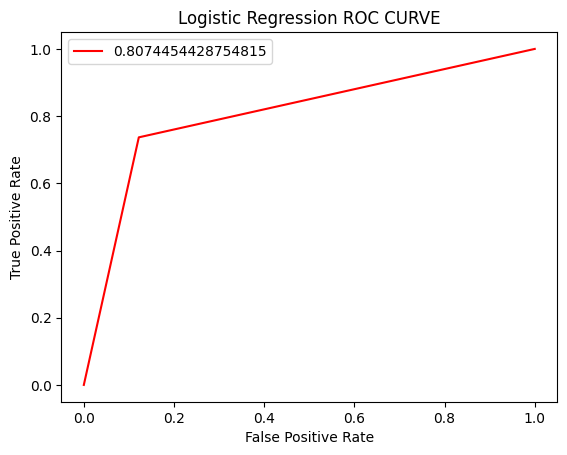

In [1100]:
auc_LR = roc_auc_score(y_test, y_pred_log)
fpr, tpr, _ = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr, color = 'RED', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC CURVE')
plt.legend()
plt.show()

%%  Logistic Regression of combination of all features shows 88.33% of accuracy

## KNN Algorithm, 
KNN works well when the data is relatively low-dimensional and doesn't have a large number of features. If our data has a reasonable number of relevant features, KNN could be considered.

In [1101]:
## Create a KNN classifier 
##choosing k=50 here , we can change it later to the designed number of folds
knn_model = KNeighborsClassifier(n_neighbors = 12)
knn_model.fit(x_train, y_train)

## making prediction
y_pred_knn = knn_model.predict(x_test)

## make the dataframe
pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_knn}).sample(10)



,Actual Survival,Predicted Survival
268,0,0
8,1,1
270,0,0
20,1,0
45,1,0
19,0,0
216,0,0
204,0,0
12,1,1
247,0,0


In [1102]:
## import metrics to find the accuracy score
print(f'Accuracy: {(metrics.accuracy_score(y_test, y_pred_knn))*100} %')

Accuracy: 73.33333333333333 %


In [1103]:
## model evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn )
print('Accuracy_Log_Reg', (metrics.accuracy_score(y_test, y_pred_knn))*100, '%')
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat)

Accuracy_Log_Reg 73.33333333333333 %
0.7333333333333333
[[41  0]
 [16  3]]


In [1104]:
## classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        41
           1       1.00      0.16      0.27        19

    accuracy                           0.73        60
   macro avg       0.86      0.58      0.55        60
weighted avg       0.81      0.73      0.66        60



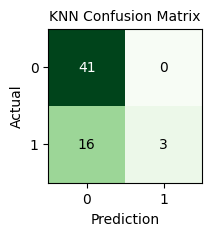

In [1105]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('KNN Confusion Matrix', fontsize = 10)
plt.show()

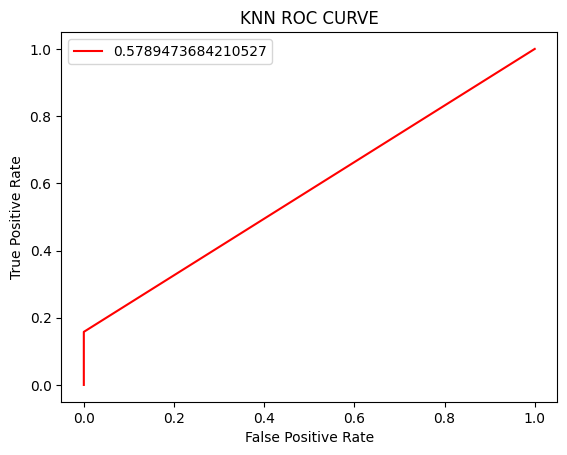

In [1106]:
auc_knn = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color = 'RED', label = auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC CURVE')
plt.legend()
plt.show()

%%  KNN Model:

n_neighbours=100 then Accuracy: 78.33 %
n_neighbours=80 then Accuracy: 80.0 %
n_neighbours=60 then Accuracy: 81.66 % ....diff tries not much changes until:
n_neighbours=40 then Accuracy: 85.0 %    n_neighbours=20 then Accuracy: 85.0 %
n_neighbours=10 then Accuracy: 86.66% I chose numbers from 20 to 14, for all of them the accuracy was 86.6 % only for n_neighbours=12 ** Accuracy: 88.33333333333333 % which is the highst accuracy by decreasing n to 10 and lower we see that the accuracy drops to the same when our n was 20..
for 13<n<20 and 5< n<10  accuracy is the same =86.66 % Therefore the highest accuracy is when we choose n=12

## Decision Tree model for our data

In [1139]:
## decision tree (from sklearn.tree import DecisionTreeClassifier)
## create a decision tree with criterion Gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## create a decision tree with criterion Entropy with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy')

## criterion Gini with max depth of 3
decision_tree_depth = DecisionTreeClassifier(max_depth = 12)

In [1141]:
## fit our model
decision_tree_gini.fit(x_train, y_train)
decision_tree_entropy.fit(x_train, y_train)
decision_tree_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [1142]:
## make prediction
y_pred_gini = decision_tree_gini.predict(x_test)
y_pred_entropy = decision_tree_entropy.predict(x_test)
y_pred_depth = decision_tree_depth.predict(x_test)
pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_gini}).sample(5)

,Actual Survival,Predicted Survival
23,0,0
248,0,0
14,1,1
103,0,1
164,0,0


In [1143]:
pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_entropy}).sample(5)

,Actual Survival,Predicted Survival
131,0,0
296,1,0
123,0,0
286,0,0
283,0,0


In [1148]:
print('Accuracy (Gini):', (metrics.accuracy_score(y_test, y_pred_gini))*100, '%')
print('Accuracy (Entropy):', (metrics.accuracy_score(y_test, y_pred_entropy))*100, '%')
print('Accuracy (Max depth):', (metrics.accuracy_score(y_test, y_pred_depth))*100, '%')

Accuracy (Gini): 73.33333333333333 %
Accuracy (Entropy): 73.33333333333333 %
Accuracy (Max depth): 68.33333333333333 %


In [1145]:
## classification report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.59      0.53      0.56        19

    accuracy                           0.73        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.73      0.73      0.73        60



In [1146]:
## classification report
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.60      0.47      0.53        19

    accuracy                           0.73        60
   macro avg       0.69      0.66      0.67        60
weighted avg       0.72      0.73      0.72        60



In [1147]:
## classification report
print(classification_report(y_test, y_pred_depth))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.50      0.42      0.46        19

    accuracy                           0.68        60
   macro avg       0.62      0.61      0.62        60
weighted avg       0.67      0.68      0.68        60



%%% Decision Tree model has almost similar accuracy to KNN:

Accuracy (Gini): 81.66666666666667 %
Accuracy (Entropy): 81.66666666666667 %
Accuracy (Max depth): 81.66666666666667 %

## SVM= Support Vector Machine: Apowerfull machine learning algorithm
SVM is effective when the data is high-dimensional and the number of features (attributes) is relatively large.•	SVM can handle both linear and non-linear classification problems.SVM can work well with small to medium-sized datasets.
 

In [1115]:
## support vector machine
clflinear = svm.SVC(kernel = 'linear')
clfsigmoid = svm.SVC(kernel = 'sigmoid')
clfrbf = svm.SVC(kernel = 'rbf')

In [1116]:
## for the model
clflinear.fit(x_train, y_train)
clfsigmoid.fit(x_train, y_train)
clfrbf.fit(x_train, y_train)

SVC()

In [1117]:
## make prediction for SVM

y_pred_linear = clflinear.predict(x_test)
y_pred_sigmoid = clfsigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)

In [1149]:
## model evalution for SVM
print('Accuracy (linear):', (metrics.accuracy_score(y_test, y_pred_linear))*100, '%')
print('Accuracy (sigmoid):', (metrics.accuracy_score(y_test, y_pred_sigmoid))*100, '%')
print('Accuracy (rbf):', (metrics.accuracy_score(y_test, y_pred_rbf))*100, '%')

Accuracy (linear): 85.0 %
Accuracy (sigmoid): 85.0 %
Accuracy (rbf): 78.33333333333333 %


In [1150]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



## Naive Bays Model
Naive Bayes works well with categorical and discrete features.A simple and computationally efficient algorithm,

In [1151]:
## create our naive bayes model
gaussian_model = GaussianNB()
## train our model
gaussian_model.fit(x_train, y_train)

GaussianNB()

In [1152]:
## Make a prediction
y_pred_GaussianNB = gaussian_model.predict(x_test)

In [1153]:
## create a dataframe for prediction
pd.DataFrame({'Actual Survived': y_test, 'Predicted Survived': y_pred_GaussianNB}).sample(10)

,Actual Survived,Predicted Survived
270,0,0
29,0,1
66,0,0
204,0,0
161,0,0
177,1,0
199,1,1
56,0,0
218,0,0
167,0,0


In [1155]:
## model evaluation
print('Accuracy (Gaussian):', (metrics.accuracy_score(y_test, y_pred_GaussianNB))*100, '%')

Accuracy (Gaussian): 76.66666666666667 %


In [1156]:
## model evaluation forGaussianNB
accuracy_GaussianNB = accuracy_score(y_test, y_pred_GaussianNB)

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_GaussianNB)
print('Accuracy (y_pred_GaussianNB):', (metrics.accuracy_score(y_test, y_pred_GaussianNB))*100, '%')

print(accuracy_GaussianNB)
print(conf_mat)

Accuracy (y_pred_GaussianNB): 76.66666666666667 %
0.7666666666666667
[[36  5]
 [ 9 10]]


In [1125]:
## classification report
print(classification_report(y_test,y_pred_GaussianNB))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.67      0.53      0.59        19

    accuracy                           0.77        60
   macro avg       0.73      0.70      0.71        60
weighted avg       0.76      0.77      0.76        60



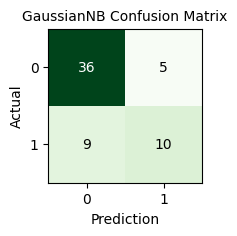

In [1126]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('GaussianNB Confusion Matrix', fontsize = 10)
plt.show()

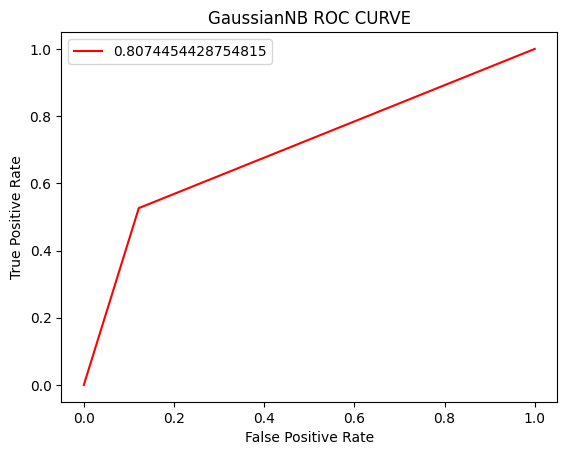

In [1127]:
auc_GaussianNB = roc_auc_score(y_test, y_pred_GaussianNB)
fpr, tpr, _ = roc_curve(y_test, y_pred_GaussianNB)
plt.plot(fpr, tpr, color = 'RED', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB ROC CURVE')
plt.legend()
plt.show()

%% Naive Bays (Gaussian) accuracy = 76.66666666666667 %

### Heirarchy Algorithm-----------------

In [1158]:
## normalize the data
Heart_norm = normalize(Heart)
Heart_norm = pd.DataFrame(Heart_norm, columns = Heart.columns)
Heart_norm.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


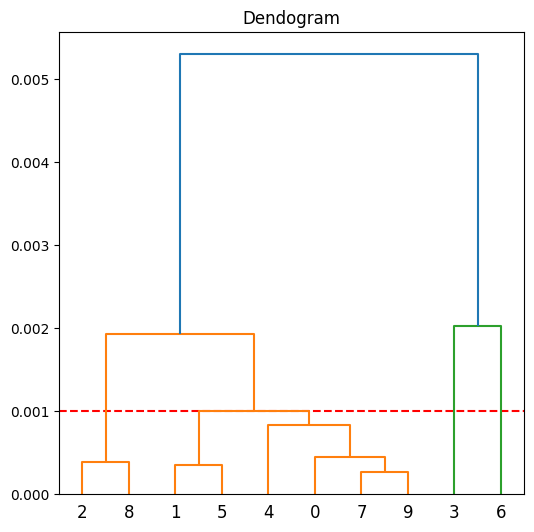

In [1160]:
## dendrogram and create subset
subset_data = Heart_norm.sample(n = 10)


plt.figure(figsize =(6, 6))
plt.title('Dendogram')
plt.axhline(y=0.001, color = 'r', linestyle = '--') ## make the cut the dendrogram

dend = shc.dendrogram(shc.linkage(subset_data, method = 'ward'))
plt.show()

In [1130]:
##clusters
from sklearn.cluster import KMeans

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=3)

In [1131]:
## cluster
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_Hierarchy_predicted = cluster.fit_predict(Heart_norm)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1132]:
Heart_norm['cluster']= y_Hierarchy_predicted 
Heart_norm

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cluster
0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.00,0.00,0.02,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2
295,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
296,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
297,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [1161]:
## pca --- dimensionality reduction
pca = PCA(n_components = 3)
new_data_Hierarchy = pca.fit_transform(Heart_norm)


In [1134]:
Heart_norm['clusters']= y_Hierarchy_predicted 
Heart_norm

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cluster,clusters
0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
3,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.00,0.00,0.02,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2,2
295,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
296,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
297,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0


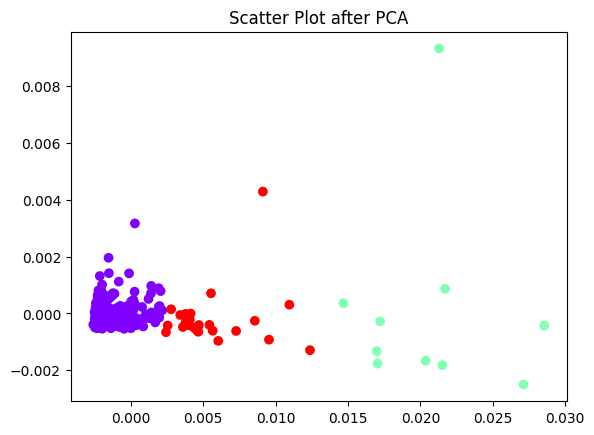

In [1162]:
## scatter plot
plt.scatter(new_data_Hierarchy[:,0], new_data_Hierarchy[:,1], c = cluster.labels_, cmap = 'rainbow')
plt.title('Scatter Plot after PCA')
plt.show()